# Проект e-commerce: вариант 1

In [1]:
# Для начала импортируем библиотеки, необходимые для решения задачи

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import requests
from urllib.parse import urlencode

%matplotlib inline

## Данные представляют собой информацию заказах и пользователях

### olist_customers_datase.csv — таблица с уникальными идентификаторами пользователей

- customer_id — позаказный идентификатор пользователя
- customer_unique_id —  уникальный идентификатор пользователя  (аналог номера паспорта)
- customer_zip_code_prefix —  почтовый индекс пользователя
- customer_city —  город доставки пользователя
- customer_state —  штат доставки пользователя

### olist_orders_dataset.csv —  таблица заказов

- order_id —  уникальный идентификатор заказа (номер чека)
- customer_id —  позаказный идентификатор пользователя
- order_status —  статус заказа
- order_purchase_timestamp —  время создания заказа
- order_approved_at —  время подтверждения оплаты заказа
- order_delivered_carrier_date —  время передачи заказа в логистическую службу
- order_delivered_customer_date —  время доставки заказа
- order_estimated_delivery_date —  обещанная дата доставки

### olist_order_items_dataset.csv —  товарные позиции, входящие в заказы

- order_id —  уникальный идентификатор заказа (номер чека)
- order_item_id —  идентификатор товара внутри одного заказа
- product_id —  ид товара (аналог штрихкода)
- seller_id — ид производителя товара
- shipping_limit_date —  максимальная дата доставки продавцом для передачи заказа партнеру по логистике
- price —  цена за единицу товара
- freight_value —  вес товара

In [2]:
# Ссылки на датасеты

olist_customers_dataset = 'https://disk.yandex.ru/d/FUi5uSd6BfG_ig'
olist_orders_dataset = 'https://disk.yandex.ru/d/t9Li4JOfgxuUrg'
olist_order_items_dataset = 'https://disk.yandex.ru/d/Gbt-yAcQrOe3Pw'

In [3]:
# К сожалению Yandex Disk не даст просто скачать файл по ссылке выше, поэтому напишем функцию для формирования такой ссылки

def download_yandex_disk(url):
    base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
    final_url = base_url + urlencode(dict(public_key=url))
    response = requests.get(final_url)
    download_url = response.json()['href']
    return download_url

In [4]:
# Выгружаем датасеты

customers = pd.read_csv(download_yandex_disk(olist_customers_dataset))
orders = pd.read_csv(download_yandex_disk(olist_orders_dataset), \
                     parse_dates=['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', \
                                 'order_delivered_customer_date', 'order_estimated_delivery_date'])
items = pd.read_csv(download_yandex_disk(olist_order_items_dataset), parse_dates=['shipping_limit_date'])

In [5]:
# Данные о пользователях
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [6]:
# Данные о покупках
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [7]:
# Данные о товарах
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


### Для решения задачи проведи предварительное исследование данных и сформулируй, что должно считаться покупкой. Обосновать свой выбор ты можешь с помощью фактов оплат, статусов заказов и других имеющихся данных

In [8]:
# Количество заказов - 99441
orders.shape

(99441, 8)

In [9]:
# Всего со статусом 'Отменен'
orders.query('order_status == "canceled"')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
397,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-04 14:29:27,2018-08-07 04:10:26,NaT,NaT,2018-08-14
613,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,2018-01-26 21:58:39,2018-01-29 22:33:25,NaT,2018-02-22
1058,3a129877493c8189c59c60eb71d97c29,0913cdce793684e52bbfac69d87e91fd,canceled,2018-01-25 13:34:24,2018-01-25 13:50:20,2018-01-26 21:42:18,NaT,2018-02-23
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
...,...,...,...,...,...,...,...,...
98791,b159d0ce7cd881052da94fa165617b05,e0c3bc5ce0836b975d6b2a8ce7bb0e3e,canceled,2017-03-11 19:51:36,2017-03-11 19:51:36,NaT,NaT,2017-03-30
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaT,NaT,2018-08-10
99143,6560fb10610771449cb0463c5ba12199,0d07d0a588caf93cc66b7a8aff86d2fe,canceled,2017-10-01 22:26:25,2017-10-01 22:35:22,NaT,NaT,2017-10-27
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01


In [10]:
# Всего со статусом 'Недоступен'
orders.query('order_status == "unavailable"')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05
586,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,NaT,NaT,2018-02-16
687,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaT,NaT,2017-09-05
737,d57e15fb07fd180f06ab3926b39edcd2,470b93b3f1cde85550fc74cd3a476c78,unavailable,2018-01-08 19:39:03,2018-01-09 07:26:08,NaT,NaT,2018-02-06
1160,2f634e2cebf8c0283e7ef0989f77d217,7353b0fb8e8d9675e3a704c60ca44ebe,unavailable,2017-09-27 20:55:33,2017-09-28 01:32:50,NaT,NaT,2017-10-27
...,...,...,...,...,...,...,...,...
99147,6cf5c427fb11bc5fe8abefa86aa7ba0b,91ac14a1e50bc022eeecf0c2ba37006a,unavailable,2017-10-17 10:53:48,2017-10-19 03:12:43,NaT,NaT,2017-10-27
99233,1c7c8ab324927f5b6e52338bd110bef4,95b1767df51d6fa09402267d8de314df,unavailable,2017-12-23 18:48:09,2017-12-23 18:54:22,NaT,NaT,2018-01-19
99252,aaab15da689073f8f9aa978a390a69d1,df20748206e4b865b2f14a5eabbfcf34,unavailable,2018-01-16 14:27:59,2018-01-17 03:37:34,NaT,NaT,2018-02-06
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15


In [11]:
orders.query('order_status == "unavailable"').isna().sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date     609
order_delivered_customer_date    609
order_estimated_delivery_date      0
dtype: int64

Сложно сказать, что попадает под категорию *Недоступен*, но видимо это заказы, которые после проведения оплаты были отменены и в данный момент они в промежуточном статусе - деньги еще не вернули, но и доставлять товар уже не будут. Поэтому их можно отнести к статусу *Отменен*.

In [12]:
# Сколько всего заказов со статусами Отменен и Недоступен
orders.query('order_status in ["canceled", "unavailable"]').shape[0]

1234

In [13]:
# Сколько всего заказов со статусами Отменен и Недоступен, по которым уже проходила оплата
orders[orders.order_approved_at.notna()].query('order_status in ["canceled", "unavailable"]').shape[0]

1093

In [14]:
# Сколько всего заказов было отменено после доставки
orders[orders.order_delivered_customer_date.notna()].query('order_status in ["canceled", "unavailable"]').shape[0]

6

Всего в таблице *orders* хранится информация о __99 441__ заказах. Из них со статусом "Отменен" и "Недоступен" - __1 234__.

Проанализируем их.
Из __1 234__ отмененных - __1 093__ заказа, которые были отменены после подтверждения оплаты.
И всего __6__, которые отменены после того, как товар был доставлен.

Поэтому можно сделать вывод, что если пользователь забрал товар, с вероятностью в \$6 / 99441 = 0,00006$ он этот заказ вернет.  
В целом небольшая вероятность :)  
__1 093__ заказа из __99 441__ тоже небольшое число - всего __1,1%__, но тут по-хорошему бы узнать у бизнеса, стоит ли включать такие заказы или нет.  
Для чистоты эксперимента я бы не стал их включать, поэтому покупкой будем считать только те заказы, у которых статус *delivered*.

In [15]:
# Сохраним все заказы со статусом delivered в отдельный датафрейм и будем работать уже с ним

orders_delivered = orders.query('order_status == "delivered"')

In [16]:
# orders[orders.isna().any(axis=1)].query('order_status == "delivered"')

In [17]:
orders_delivered.shape

(96478, 8)

### 1. Сколько у нас пользователей, которые совершили покупку только один раз? (7 баллов)

Уникальный идентификатор пользователя содержится в *customers* в столбце *customer_unique_id*.  
Необходимо соединить две таблицы по идентификатору *customer_id* и посчитать число уникальных пользователей

In [18]:
# Создаем датафрейм с заказами и уникальными id пользователей
orders_uniq = orders_delivered.merge(customers[['customer_id', 'customer_unique_id']], how='left', on='customer_id')

In [19]:
# Проверяем, что никакие заказы не потеряны
orders_uniq.shape[0] == orders_delivered.shape[0]

True

Рассчитываем число уникальных пользователей, совершивших только одну покупку

In [20]:
orders_uniq.groupby('customer_unique_id', as_index=False) \
            .agg({'order_id': 'count'}) \
            .query('order_id == 1') \
            .shape[0]

90557

Число пользователей, которые совершили покупку только один раз - __90 557__

### 2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)? (5 баллов)

In [21]:
# Добавим столбец с годом и месяцем ожидаемой даты доставки для удобства группировки
orders['delivery_date'] = orders.order_estimated_delivery_date.dt.to_period('M')

In [22]:
# 
orders_undelivered = orders.query("order_status != 'delivered'") \
                            .groupby(['delivery_date', 'order_status'], as_index=False) \
                            .agg({'order_id': 'count'}) \
                            .rename(columns={'order_id': 'orders'}) \
                            .groupby('order_status', as_index=False) \
                            .agg({'orders': 'mean'}) \
                            .round(2)

orders_undelivered

,order_status,orders
0,approved,1.00
1,canceled,24.04
2,created,1.67
3,invoiced,14.95
4,processing,15.84
5,shipped,48.13
6,unavailable,29.00


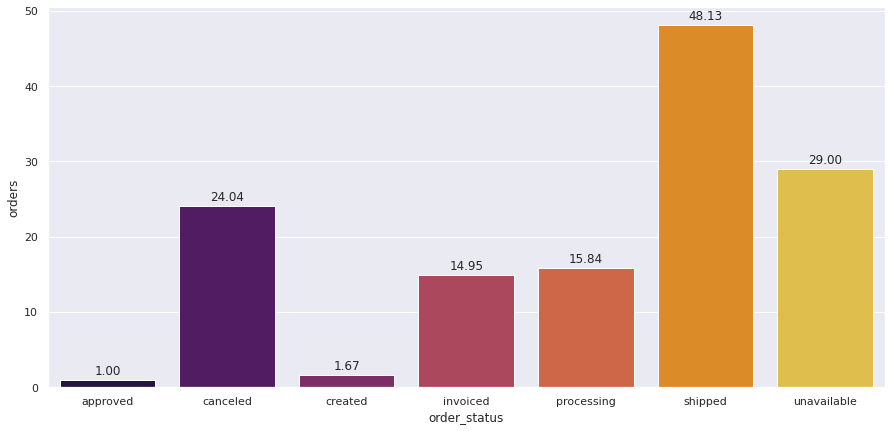

In [23]:
sns.set(rc={"figure.figsize": (15, 7)})
ax = sns.barplot(data=orders_undelivered, x='order_status', y='orders', palette='inferno')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

Как видно на графике, чаще всего причиной не доставленного заказа в среднем является то, что он еще обрабатывается, не оплачен или едет покупателю. А значит, в теории еще может быть доставлен.  
В рамках задачи следует рассматривать статусы *Отменен* и *Недоступен*. По этим заказам доставка осуществляться уже точно не будет, и таких заказов в среднем по месяцу __24__ отмененных и __29__ недоступных.

### 3. По каждому товару определить, в какой день недели товар чаще всего покупается. (5 баллов)

Для решения задачи необходимо объединить два датасета - *orders* и *items*. Берем только заказы со статусом *delivered*, так как только их мы считаем за покупки

In [24]:
# Для начала добавим столбец по дню недели, когда был сделан заказ
orders['delivery_weekday'] = orders.order_purchase_timestamp.dt.day_name()

In [25]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_date,delivery_weekday
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10,Monday
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018-08,Tuesday
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018-09,Wednesday
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017-12,Saturday
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018-02,Tuesday


In [26]:
# Обновим orders_delivered
orders_delivered = orders.query('order_status == "delivered"')
orders_delivered.shape

(96478, 10)

In [27]:
# Соединяем две таблицы - orders и items по ключу orders_id
orders_items_merge = orders_delivered[['order_id', 'delivery_weekday']].merge(items[['order_id', 'product_id']], how='left', on='order_id')
orders_items_merge.head()

,order_id,delivery_weekday,product_id
0,e481f51cbdc54678b7cc49136f2d6af7,Monday,87285b34884572647811a353c7ac498a
1,53cdb2fc8bc7dce0b6741e2150273451,Tuesday,595fac2a385ac33a80bd5114aec74eb8
2,47770eb9100c2d0c44946d9cf07ec65d,Wednesday,aa4383b373c6aca5d8797843e5594415
3,949d5b44dbf5de918fe9c16f97b45f8a,Saturday,d0b61bfb1de832b15ba9d266ca96e5b0
4,ad21c59c0840e6cb83a9ceb5573f8159,Tuesday,65266b2da20d04dbe00c5c2d3bb7859e


In [28]:
orders_items_merge.shape

(110197, 3)

Проверяем получившийся датасет и видим, что строк стало больше - с __96 478__ до __110 197__. Как так?  
Сразу вспоминается [статья](https://habr.com/ru/post/448072/) на Хабре.  
При LEFT JOIN такое возможно, когда в ключе, по которому мы соединяем таблицы, есть повторяющиеся значения в одной из таблиц. В таблице *orders* в *order_id* их нет - 1 заказ - 1 строка. Но в *items* в одном заказе может быть несколько *product_id*.  Поэтому происходит небольшой CROSS JOIN по этим позициям -> отсюда и увеличение числа строк. В целом здесь все корректно, в этой задаче нам нужны только *product_id*, их и берем.

Окей, разобрались, идем дальше!

In [29]:
# Агрегируем по id товара и дню недели 
products_weekday = orders_items_merge.groupby(['product_id', 'delivery_weekday'], as_index=False) \
                                            .agg({'order_id': 'count'}) \
                                            .rename(columns={'order_id': 'sales'})

products_weekday.head()

,product_id,delivery_weekday,sales
0,00066f42aeeb9f3007548bb9d3f33c38,Sunday,1
1,00088930e925c41fd95ebfe695fd2655,Tuesday,1
2,0009406fd7479715e4bef61dd91f2462,Thursday,1
3,000b8f95fcb9e0096488278317764d19,Friday,1
4,000b8f95fcb9e0096488278317764d19,Wednesday,1


Результирующая таблица по товарам и продажам в лучший день недели

In [30]:
products_best_weekday = products_weekday.loc[products_weekday.groupby('product_id')['sales'].idxmax()]
products_best_weekday.head(15)

,product_id,delivery_weekday,sales
0,00066f42aeeb9f3007548bb9d3f33c38,Sunday,1
1,00088930e925c41fd95ebfe695fd2655,Tuesday,1
2,0009406fd7479715e4bef61dd91f2462,Thursday,1
3,000b8f95fcb9e0096488278317764d19,Friday,1
5,000d9be29b5207b54e86aa1b1ac54872,Tuesday,1
6,0011c512eb256aa0dbbb544d8dffcf6e,Thursday,1
7,00126f27c813603687e6ce486d909d01,Sunday,2
9,001795ec6f1b187d37335e1c4704762e,Saturday,3
13,001b237c0e9bb435f2e54071129237e9,Thursday,1
19,001b72dfd63e9833e8c02742adf472e3,Wednesday,5


### 4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть. (8 баллов) 

Для выполнения задания будем использовать датасеты *orders* и *customers*

In [31]:
# Соединим orders и customers по customer_id
orders_customers = orders_delivered[['customer_id', 'order_purchase_timestamp', 'order_id']] \
                    .merge(customers[['customer_id', 'customer_unique_id']], how='left', on='customer_id')
orders_customers.head()

,customer_id,order_purchase_timestamp,order_id,customer_unique_id
0,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff
1,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231
2,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8
3,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977
4,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6


In [32]:
# Проверка на наличие потерь
orders_customers.shape[0] == orders_delivered.shape[0]

True

Идея решения такая:  
1) Добавляем столбец с годом и месяцем, так как в задании сказано о "покупках в неделях по месяцам";  
2) Группируем по уникальным идентификаторам пользователя и год + месяц, агрегируя по количеству покупок;  
3) В полученную таблицу добавляем столбец с количеством недель в месяц - число дней в месяц / число дней в неделе, так мы учтем, что внутри месяца не всегда целое количество недель;  
4) Затем добавим итоговый столбец по покупкам в неделю, разделив количество покупок в месяц на число недель.

In [33]:
# Столбец с годом и месяцем
orders_customers['month'] = orders_customers.order_purchase_timestamp.dt.to_period('M')

In [34]:
orders_customers.head()

,customer_id,order_purchase_timestamp,order_id,customer_unique_id,month
0,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,2017-10
1,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,2018-07
2,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,2018-08
3,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,2017-11
4,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,2018-02


In [35]:
# Группировка по пользователям и месяцу, агрегируя количество покупок
orders_by_month = orders_customers.groupby(['customer_unique_id', 'month'], as_index=False) \
                                .agg({'order_id': 'count'}) \
                                .rename(columns={'order_id': 'quantity'})
orders_by_month.head()

,customer_unique_id,month,quantity
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,1
2,0000f46a3911fa3c0805444483337064,2017-03,1
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,1
4,0004aac84e0df4da2b147fca70cf8255,2017-11,1


In [36]:
# Добавляем столбцы с расчетом количества недель в месяц и покупок в неделю по месяцам
orders_by_month['weeks_in_month'] = orders_by_month.month.dt.days_in_month / 7
orders_by_month['orders_by_week'] = orders_by_month.quantity / orders_by_month.weeks_in_month

Таблица с количеством заказов в неделю по каждому месяцу в столбце *orders_by_week*

In [37]:
orders_by_month.head()

,customer_unique_id,month,quantity,weeks_in_month,orders_by_week
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,1,4.428571,0.225806
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,1,4.428571,0.225806
2,0000f46a3911fa3c0805444483337064,2017-03,1,4.428571,0.225806
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,1,4.428571,0.225806
4,0004aac84e0df4da2b147fca70cf8255,2017-11,1,4.285714,0.233333


Так как в задании необходимо получить количество заказов в неделю __в среднем__ для каждого пользователя, сгруппируем по уникальному пользователю и посчитаем среднее количество покупок в неделю по месяцам

In [57]:
orders_by_week = orders_by_month.groupby('customer_unique_id', as_index=False)['orders_by_week'].mean()

Результирующая таблица со средним количеством заказов в неделю по месяцам в столбце *orders_by_week*

In [58]:
orders_by_week.head()

,customer_unique_id,orders_by_week
0,0000366f3b9a7992bf8c76cfdf3221e2,0.225806
1,0000b849f77a49e4a4ce2b2a4ca5be3f,0.225806
2,0000f46a3911fa3c0805444483337064,0.225806
3,0000f6ccb0745a6a4b88665a16c9f078,0.225806
4,0004aac84e0df4da2b147fca70cf8255,0.233333


### 5. Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц. Описание подхода можно найти тут. (10 баллов)

Для анализа берем датасет из прошлого задания *orders_customers*. Будем рассматривать тех пользователей, которые точно совершили заказ и забрали его - статус *delivered*.

Когортный анализ необходимо построить за 1 полный год. Посмотрим, какой временной промежуток занимают данные

In [38]:
orders_customers.month.sort_values().unique()

<PeriodArray>
['2016-09', '2016-10', '2016-12', '2017-01', '2017-02', '2017-03', '2017-04',
 '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11',
 '2017-12', '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06',
 '2018-07', '2018-08']
Length: 23, dtype: period[M]

Полный год в данных - 2017. Будем использовать его.

In [39]:
orders_customers_2017 = orders_customers.loc[(orders_customers.month <= '2017-12') & ('2017-01' <= orders_customers.month)]
orders_customers_2017.head()

,customer_id,order_purchase_timestamp,order_id,customer_unique_id,month
0,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,2017-10
3,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,2017-11
5,503740e9ca751ccdda7ba28e9ab8f608,2017-07-09 21:57:05,a4591c265e18cb1dcee52889e2d8acc3,80bb27c7c16e8f973207a5086ab329e2,2017-07
6,9bdf08b4b3b52b5526ff42d37d47f222,2017-05-16 13:10:30,6514b8ad8028c9f2cc2374ded245783f,932afa1e708222e5821dac9cd5db4cae,2017-05
7,f54a9f0e6b351c431402b8461ea51999,2017-01-23 18:29:09,76c6e866289321a7c93b82b54852dc33,39382392765b6dc74812866ee5ee92a7,2017-01


Чтобы построить когорты, нам нужно сгруппировать клиентов по дате их первой покупки. В данных нет такого поля, значит, нужно его посчитать

In [40]:
# Группируем по уникальному юзеру и выбираем у него минимальную дату, это и будет дата первой покупки
first_order = orders_customers_2017.groupby('customer_unique_id').agg({'month': 'min'}).rename(columns={'month': 'first_order'})
first_order.head()

,first_order
customer_unique_id,
0000f46a3911fa3c0805444483337064,2017-03
0000f6ccb0745a6a4b88665a16c9f078,2017-10
0004aac84e0df4da2b147fca70cf8255,2017-11
0005e1862207bf6ccc02e4228effd9a0,2017-03
0006fdc98a402fceb4eb0ee528f6a8d4,2017-07


Итак, когортами будем считать пользователей, сделавших первую покупку в тот или иной месяц. Метрика для отслеживания — количество уникальных пользователей помесячно.

Сначала добавим даты первой покупки пользователей в таблицу с заказами, которые получили выше, затем сгруппируем по датам первой покупки и заказам и посчитаем количество уникальных пользователей для каждой когорты.

In [41]:
# Объединяем датасет с заказами в 2017 году и столбец с первой покупкой
first_order_customers = orders_customers_2017.merge(first_order, how='inner', left_on='customer_unique_id', right_index=True) \
                                            .reset_index(drop=True)
first_order_customers.head()

,customer_id,order_purchase_timestamp,order_id,customer_unique_id,month,first_order
0,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,2017-10,2017-09
1,31f31efcb333fcbad2b1371c8cf0fa84,2017-09-04 11:26:38,69923a4e07ce446644394df37a710286,7c396fd4830fd04220f754e42b4e5bff,2017-09,2017-09
2,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,2017-11,2017-11
3,503740e9ca751ccdda7ba28e9ab8f608,2017-07-09 21:57:05,a4591c265e18cb1dcee52889e2d8acc3,80bb27c7c16e8f973207a5086ab329e2,2017-07,2017-07
4,9bdf08b4b3b52b5526ff42d37d47f222,2017-05-16 13:10:30,6514b8ad8028c9f2cc2374ded245783f,932afa1e708222e5821dac9cd5db4cae,2017-05,2017-05


Группируем по датам первого заказа и всех остальных заказов, если они были совершены.

In [42]:
cohorts = first_order_customers.groupby(['first_order','month'])['customer_unique_id'] \
                                .agg(['nunique', 'count']) \
                                .rename(columns={'nunique': 'total_clients', 'count': 'total_orders'})
cohorts

total_clients  total_orders
first_order month                               
2017-01     2017-01            718           750
            2017-02              2             2
            2017-03              2             2
            2017-04              1             1
            2017-05              3             3
...                            ...           ...
2017-10     2017-11             31            33
            2017-12             11            11
2017-11     2017-11           7061          7161
            2017-12             40            42
2017-12     2017-12           5338          5395

[77 rows x 2 columns]

Мы хотим посмотреть, как каждая когорта вела себя в течение 3 месяцев после первой покупки, поэтому нам необходимо проиндексировать каждую когорту. Например, *cohort_period = 0* будет самым первым месяцем когорты, когда была осуществлена первая покупка пользователя. *сohort_period = 1* является вторым месяцем, в котором тот же пользователь совершил покупку, и так далее. Это позволяет нам сравнивать когорты между собой с течением времени

In [43]:
def cohort_period(df):
     df['cohort_period'] = np.arange(len(df))
     return df
cohorts = cohorts.groupby(level=0).apply(cohort_period)

Переформатируем таблицу, оставив только номер когорты, дату первого заказа и количество уникальных юзеров

In [44]:
cohorts = cohorts.reset_index().set_index(['cohort_period', 'first_order'])['total_clients'].unstack(0)
cohorts

cohort_period,0,1,2,3,4,5,6,7,8,9,10
first_order,,,,,,,,,,,
2017-01,718.0,2.0,2.0,1.0,3.0,1.0,3.0,1.0,1.0,3.0,1.0
2017-02,1628.0,3.0,5.0,2.0,7.0,2.0,4.0,3.0,2.0,3.0,2.0
2017-03,2503.0,11.0,9.0,10.0,9.0,4.0,4.0,8.0,8.0,2.0,NaN
2017-04,2257.0,14.0,5.0,4.0,6.0,6.0,8.0,7.0,7.0,NaN,NaN
2017-05,3451.0,16.0,16.0,10.0,10.0,11.0,14.0,5.0,NaN,NaN,NaN
2017-06,3037.0,15.0,12.0,13.0,9.0,12.0,11.0,NaN,NaN,NaN,NaN
2017-07,3753.0,20.0,13.0,9.0,11.0,8.0,NaN,NaN,NaN,NaN,NaN
2017-08,4057.0,28.0,14.0,11.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,4005.0,28.0,22.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Теперь посчитаем тот самый __Retention Rate__. Изменим данные, так, чтобы показать доли возврата от первоначального размера когорты.

In [45]:
retention_rate = cohorts.divide(cohorts[0], axis=0)
retention_rate

cohort_period,0,1,2,3,4,5,6,7,8,9,10
first_order,,,,,,,,,,,
2017-01,1.0,0.002786,0.002786,0.001393,0.004178,0.001393,0.004178,0.001393,0.001393,0.004178,0.001393
2017-02,1.0,0.001843,0.003071,0.001229,0.004300,0.001229,0.002457,0.001843,0.001229,0.001843,0.001229
2017-03,1.0,0.004395,0.003596,0.003995,0.003596,0.001598,0.001598,0.003196,0.003196,0.000799,NaN
2017-04,1.0,0.006203,0.002215,0.001772,0.002658,0.002658,0.003545,0.003101,0.003101,NaN,NaN
2017-05,1.0,0.004636,0.004636,0.002898,0.002898,0.003187,0.004057,0.001449,NaN,NaN,NaN
2017-06,1.0,0.004939,0.003951,0.004281,0.002963,0.003951,0.003622,NaN,NaN,NaN,NaN
2017-07,1.0,0.005329,0.003464,0.002398,0.002931,0.002132,NaN,NaN,NaN,NaN,NaN
2017-08,1.0,0.006902,0.003451,0.002711,0.003451,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,1.0,0.006991,0.005493,0.002747,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Для удобства восприятия изобразим полученные данные о __retention__ на графике, где по оси Х - номер месяца, когда пользователь вернулся, а по оси Y - дата первой покупки.

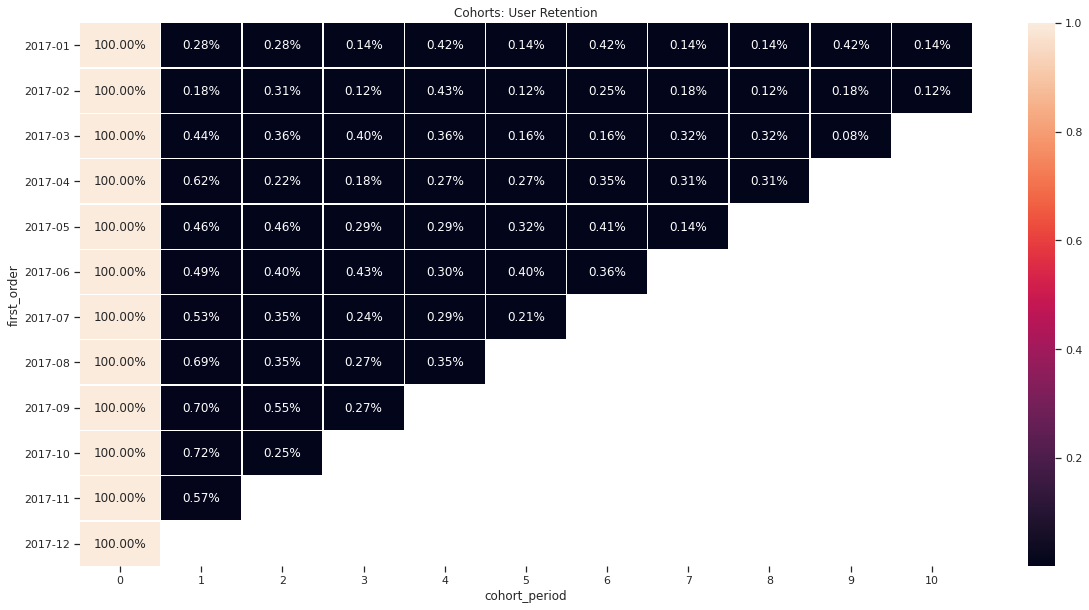

In [50]:
sns.set(style='ticks',
        rc={"figure.figsize": (20, 10)})
plt.title('Cohorts: User Retention')
sns.heatmap(retention_rate, mask=retention_rate.isnull(), annot=True, fmt='.2%', linewidth=.3)

Наиболее высокий *Retention* за третий месяц у когорты пользователей, которые совершили заказ __'2017-06'__ - он составляет __0,43%__.

### 6. Часто для качественного анализа аудитории используют подходы, основанные на сегментации. Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию.  (35 баллов)

В данной задаче будем считать и анализировать такие метрики, как:

- __Recency__ - давность (время прошедшее с последней покупки);
- __Frequency__ - частота (количество покупок пользователя);
- __Monetary__ - сумма покупки (сколько пользователь потратил);

План решения задачи:

1) Рассчитываем __Recency__;  
2) Рассчитываем __Frequency__;  
3) Рассчитываем __Monetary__;  
4) По каждой метрике находим квантиль распределения;  
5) Сегментируем данные на кластеры в зависимости от квантилей;  
6) Объединяем __R__, __F__, __M__ и рассчитываем __RFM - score__

In [59]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_date,delivery_weekday
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10,Monday
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018-08,Tuesday
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018-09,Wednesday
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017-12,Saturday
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018-02,Tuesday


In [60]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [61]:
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [64]:
orders.shape[0], customers.shape[0], items.shape[0]

(99441, 99441, 112650)

In [65]:
orders_delivered.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_date,delivery_weekday
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10,Monday
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018-08,Tuesday
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018-09,Wednesday
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017-12,Saturday
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018-02,Tuesday


In [79]:
df_orders = orders_delivered[['order_id', 'customer_id', 'order_purchase_timestamp']] \
            .merge(customers[['customer_id', 'customer_unique_id']], on='customer_id') \
            .merge(items[['order_id', 'price']], on='order_id')

df_orders.head()

,order_id,customer_id,order_purchase_timestamp,customer_unique_id,price
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,29.99
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,af07308b275d755c9edb36a90c618231,118.70
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,3a653a41f6f9fc3d2a113cf8398680e8,159.90
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,7c142cf63193a1473d2e66489a9ae977,45.00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,72632f0f9dd73dfee390c9b22eb56dd6,19.90


Из прошлого задания мы знаем, что временной промежуток в данных затрагивает интервал с сентября 2016 до августа 2018 года.  
Разница между текущей датой и самой последней покупкой будет весьма большой - больше 4 лет :O

In [83]:
df_orders.order_purchase_timestamp.max()

Timestamp('2018-08-29 15:00:37')

Поэтому предлагаю вернуться в прошлое и представить, что мы сейчас находимся в 2018 году, а именно 30 августа. То есть, прошел всего один день с самой последней покупки в наших данных.

In [88]:
today = df_orders.order_purchase_timestamp.max() + pd.Timedelta(days=1)

Кроме того, заказы могут иметь несколько строк (по одной строке на товар). Однако нас интересует, сколько раз клиент покупал, а не сколько товаров он купил.  
Создадим датафрейм, в который будут агрегированы продажи на уровне заказа.

In [111]:
sales = df_orders.groupby(['order_id', 'order_purchase_timestamp', 'customer_unique_id'], as_index=False).agg({'price': 'sum'})
sales.head()

,order_id,order_purchase_timestamp,customer_unique_id,price
0,00010242fe8c5a6d1ba2dd792cb16214,2017-09-13 08:59:02,871766c5855e863f6eccc05f988b23cb,58.90
1,00018f77f2f0320c557190d7a144bdd3,2017-04-26 10:53:06,eb28e67c4c0b83846050ddfb8a35d051,239.90
2,000229ec398224ef6ca0657da4fc703e,2018-01-14 14:33:31,3818d81c6709e39d06b2738a8d3a2474,199.00
3,00024acbcdf0a6daa1e931b038114c75,2018-08-08 10:00:35,af861d436cfc08b2c2ddefd0ba074622,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,2017-02-04 13:57:51,64b576fb70d441e8f1b2d7d446e483c5,199.90


Теперь рассчитаем метрики __RFM__ и запишем их в новый датафрейм

In [129]:
# Добавим столбец с количеством дней, прошедших с момента последней покупки
sales['days_since_order'] = sales.order_purchase_timestamp.apply(lambda x: (today - x).days)

In [130]:
aggregation = {
    'days_since_order': lambda x: x.min(), # Recency - агрегация по минимальному количеству дней
    'order_id': 'count', # Frequency - суммарное количество покупок пользователя
    'price': 'sum' # Monetary - общая сумма, потраченная пользователем
}

In [132]:
# Группируем по уникальному пользователю и рассчитываем метрики RFM
rfm = sales.groupby('customer_unique_id', as_index=False) \
            .agg(aggregation) \
            .rename(columns={'days_since_order': 'recency', 'order_id': 'frequency', 'price': 'monetary'})
rfm.head()

,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,18.90
2,0000f46a3911fa3c0805444483337064,537,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,288,1,180.00


Чтобы качественно определить сегменты, сначала лучше посмотреть на распределения каждого показателя в отдельности.  
Для этого можно воспользоваться квантилями и разделить пользователей по каждому показателю на три сегмента.

In [174]:
quantiles = rfm[['recency', 'frequency', 'monetary']].quantile([.33, .66])
quantiles

,recency,frequency,monetary
0.33,147.0,1.0,57.9
0.66,286.0,1.0,124.9


Дополнительно изобразим распределение каждой метрики на графике

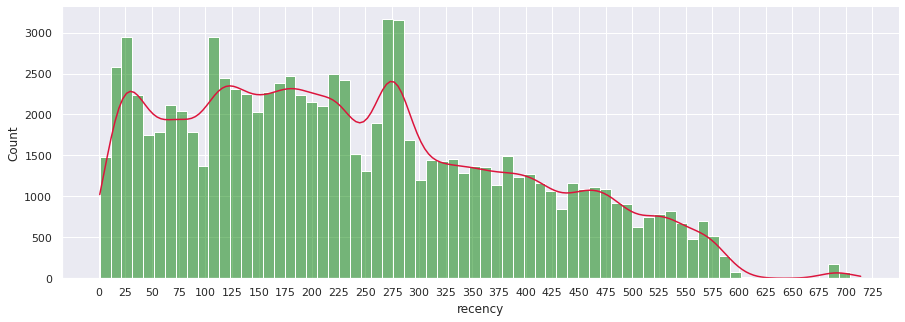

In [192]:
# Распределение Recency - по оси Х - количество дней, по оси Y - количество пользователей с таким числом дней
sns.set(style="darkgrid", 
        rc={"figure.figsize": (15, 5)})
ax = sns.histplot(rfm.recency, color='green', kde=True)
ax.lines[0].set_color('crimson')
ax.set_xticks(range(0, 750, 25))
sns.despine()

Анализируя график и данные __Recency__ по квантилям, отчетливо выделяется граница в 300+ дней для сегментации правой части распределения.  
Граница в 147 дней для разделения 33% пользователей мне не очень нравится, так как левее есть более четкий кластер в 90 дней, возьмем его за вторую границу.  
Итого, 0 - 90 дней, 90 - 300 дней, 300+ дней.

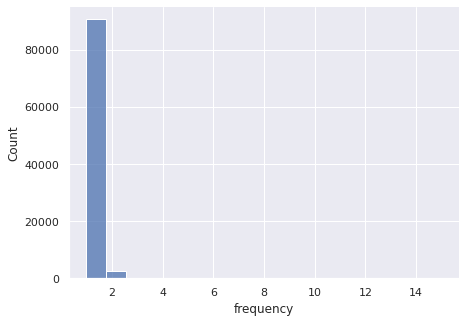

In [153]:
# Распределение Frequency - по оси Х - количество покупок пользователей, по оси Y - количество таких пользователей
sns.set(style="darkgrid", 
        rc={"figure.figsize": (7, 5)})
ax = sns.histplot(rfm.frequency)
sns.despine()

In [150]:
rfm.frequency.value_counts(normalize=True)

1     0.969997
2     0.027561
3     0.001939
4     0.000300
5     0.000096
6     0.000054
7     0.000032
15    0.000011
9     0.000011
Name: frequency, dtype: float64

Данные по количеству заказов __Frequency__ почти на __97%__ состоят из единиц. Поэтому, если пользователь совершил хотя бы две покупки - это уже хорошо. Будем делить на сегменты - 1 покупка, 2 покупки, 3 и более покупок.

In [170]:
rfm.monetary.sort_values().tail(15)

416       3999.90
73826     4059.00
73127     4080.00
91326     4099.99
86855     4399.87
59163     4400.00
26640     4590.00
87148     4690.00
23411     5934.60
93081     6499.00
25436     6729.00
80463     6735.00
43168     7160.00
79636     7388.00
3724     13440.00
Name: monetary, dtype: float64

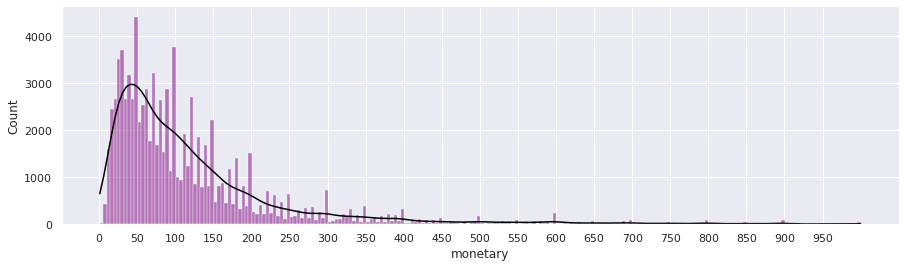

In [203]:
# Распределение сумм, потраченных пользователями. По оси Х - итоговая сумма пользователя, по оси Y - число таких пользователей
# Для наглядности распределения рассматриваем чеки стоимостью не более 1000 единиц
sns.set(style="darkgrid", 
        rc={"figure.figsize": (15, 4)})
ax = sns.histplot(rfm.monetary.loc[rfm.monetary <= 1000], color='purple', kde=True)
ax.lines[0].set_color('black')
ax.set_xticks(range(0, 1000, 50))
sns.despine()

In [204]:
# 90-ый и 99-ый квантили
rfm.monetary.quantile([.9, .99])

0.91     299.80
0.99    1004.99
Name: monetary, dtype: float64

In [200]:
rfm.monetary.describe()

count    93358.000000
mean       141.621480
std        215.694014
min          0.850000
25%         47.650000
50%         89.730000
75%        154.737500
max      13440.000000
Name: monetary, dtype: float64

Как показывает анализ данных распределения __Monetary__, __90%__ пользователей покупают на сумму менее __280__ у.е. и всего лишь __1%__ - более __1000__.  

Разделим пользователей по медиане, округлим в большую сторону и возьмем первый интервал от 0 до 100. Второй интервал берем для 90% пользователей, округляя в большую сторону - от 100 до 300. И третий интервал - покупатели, которые совершают дорогие покупки, но которых так мало - более 300 у.е.

Таким образом делим данные на сегменты:

### Recency
1 - давние клиенты (более 10 месяцев отсутствия, или более 300 дней)  
2 - спящие (от 5 до 9 месяцев, или от 150 до 300 дней)  
3 - недавние (до 5 месяцев, или до 150 дней)  

### Frequency
1 - покупает редко (1 покупка)  
2 - нечасто (2 покупки)  
3 - часто (3 и более покупок)  

### Monetary
1 - малая сумма чека (покупки до 100 у.е.)  
2 - средняя сумма чека (покупки от 100 до 300 у.е.)  
3 - большая сумма чека (покупки от 300 у.е.)

Теперь запишем ранги сегментов в датафрейм

In [212]:
# Определяем максимальные значения для определения четких границ
rfm.recency.max(), rfm.frequency.max(), rfm.monetary.max()

(714, 15, 13440.0)

In [234]:
# Добавляем столбцы с номером сегмента
rfm['r'] = pd.cut(rfm.recency, [0, 150, 300, 715], labels=['3', '2', '1']).astype(str)
rfm['f'] = pd.cut(rfm.frequency, [0, 1, 2, 16], labels=['1', '2', '3']).astype(str)
rfm['m'] = pd.cut(rfm.monetary, [0, 100, 300, 13441], labels=['1', '2', '3']).astype(str)

Записываем название сегмента в столбец *rfm_score*. Всего таких сегментов __27__ = 3 \* 3 \* 3

In [236]:
# Так как столбцы в string формате, просто складываем их - конкатенируем
rfm['rfm_score'] = rfm.r + rfm.f + rfm.m

In [237]:
rfm.head()

,customer_unique_id,recency,frequency,monetary,r,f,m,rfm_score
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,129.90,3,1,2,312
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,18.90,3,1,1,311
2,0000f46a3911fa3c0805444483337064,537,1,69.00,1,1,1,111
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,25.99,1,1,1,111
4,0004aac84e0df4da2b147fca70cf8255,288,1,180.00,2,1,2,212


Сегментация пользователей завершена, итоговая таблица сохранена в переменной __rfm__.  
Посмотрим на распределение полученных кластеров.

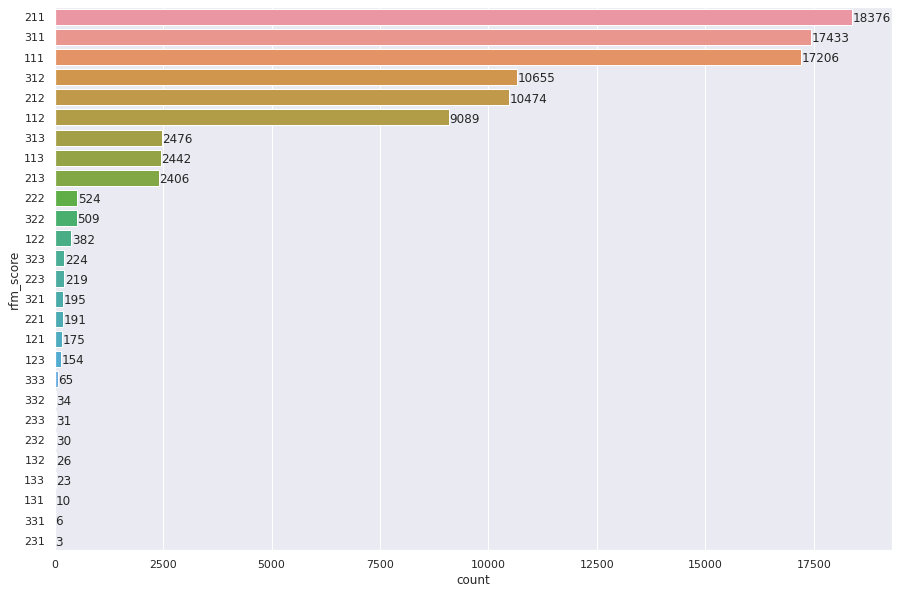

In [288]:
sns.set(rc={"figure.figsize": (15, 10)})
ax = sns.countplot(y=rfm.rfm_score, order=rfm.rfm_score.value_counts().index)
for p in ax.patches:
        ax.annotate(p.get_width(),
                    (p.get_width() + 10, p.get_y() + p.get_height()*0.8))

На графике видно, ТОП-3 пользователей представляют собой:
- 211 - спящие пользователи, покупающие редко и мало;
- 311 - недавние пользователи, которые купили что-то недорогое один раз;
- 111 - самые нежелательные пользователи - купили что-то недорогое один раз и ушли;